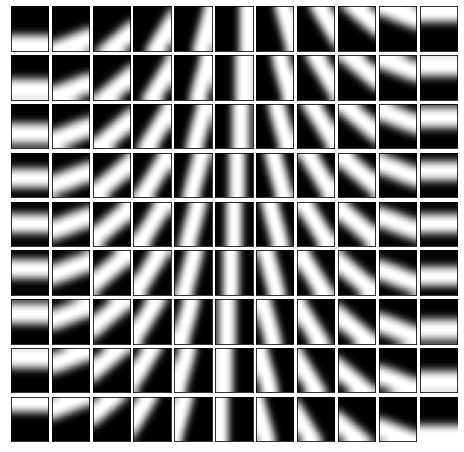

In [1]:
from tallem.datasets import *
bar, c = white_bars(n_pixels=25, r=0.23, sigma=2.35)

## Show grid of simples
samples = []
for d in np.linspace(0.5, -0.5, num=9, endpoint=True):
	for theta in np.linspace(0, np.pi, num=11, endpoint=True):
		samples.append(np.ravel(bar(theta, d)).flatten())
samples = np.vstack(samples)
fig, ax = plot_images(samples, shape=(25,25), max_val=c, layout=(9,11))

In [2]:
# R = np.random.uniform(size=5000, low=0.0, high=1.0)
# Theta = np.random.uniform(size=5000, low=0.0, high=np.pi)

## Generate the data 
# bars = np.vstack([np.ravel(bar(b, theta)).flatten() for b, theta in zip(R, Theta)])
# params = np.vstack([(b, theta) for b, theta in zip(R, Theta)])
from tallem.samplers import landmarks
bars, params = [], []
for d in np.linspace(-0.5, 0.5, num=100, endpoint=True):
	for theta in np.linspace(0, np.pi, num=100, endpoint=True):
		bars.append(np.ravel(bar(theta, d)).flatten())
		params.append(np.array([theta, d]))
bars = np.vstack(bars)
params = np.vstack(params)

In [ ]:

## Choose landmarks on the image metric 
# Lind, Lrad = landmarks(bars, 1200)
# X = bars[Lind,:]
# p = params[Lind,:]
from tallem.samplers import landmarks

## Choose landmarks using the intrinsic metric 
Lind, Lrad = landmarks(params, 1200)
X = bars[Lind,:]
p = params[Lind,:]

## Showa grid of random samples
idx = np.random.choice(X.shape[0], size=25*25, replace=False)
fig, ax = plot_images(X[idx,:], shape=(25,25), max_val=c, layout=(9,11))

## Show parameterization
%matplotlib inline
scatter2D(p[:,[1,0]], c = p[:,1], s = 30.30, figsize=(3,3))
scatter2D(p[:,[1,0]], c = p[:,0], s = 30.30, figsize=(3,3))

In [3]:
cover = LandmarkCover(X, n_sets=20, scale=1.1)
top = TALLEM(cover, local_map="iso3", D=3)
emb = top.fit_transform(X=X)
print(top)

NameError: name 'LandmarkCover' is not defined

In [ ]:
from tallem.dimred import pca
emb = pca(X)
scatter3D(emb, c=p[:,1], figsize=(3,3))

In [ ]:
top.plot_nerve(X = X, vertex_scale=10, layout="hausdorff", edge_color="frame")

In [ ]:
from tallem.dimred import isomap
Y = top.assemble_high()
Z = isomap(Y, 3, p = 0.15)
scatter3D(Z, figsize=(8, 6), c=p[:,0])

In [ ]:
## Use circular coordinate
polar_coordinate = p[:,0]
cover = CircleCover(polar_coordinate, n_sets=20, scale=1.5, lb=0, ub=np.pi) # 20, 1.5 is best
top = TALLEM(cover, local_map="pca3", D=3, pou="triangular")
emb = top.fit_transform(X=X)

top.plot_nerve(X=X, layout="hausdorff")

In [ ]:
%matplotlib inline
fig, ax = scatter3D(emb, c=polar_coordinate)

In [ ]:
emb = isomap(X, 3, p = 0.15)
fig, ax = scatter3D(emb, figsize=(8, 6), c=p[:,0])

In [ ]:



## Use parameters for color
# angles = np.linspace(0, 360, num=6, endpoint=False)
# scatter3D(emb, c=params[:,0], angles=angles, layout=(2, 3), figsize=(14,10))






from bokeh.io import output_notebook
output_notebook()
top.plot_nerve(vertex_scale=10, layout="hausdorff", edge_color="frame")

# angles = np.linspace(0, 360, num=6, endpoint=False)
# scatter3D(emb, c=params[:,0], angles=angles, layout=(2, 3), figsize=(14,10))
%matplotlib
fig, ax = scatter3D(emb, c=polar_coordinate)
# import matplotlib.pyplot as plt
# plt.imshow(X[0,:].reshape((25,25)), aspect='auto')
# https://stackoverflow.com/questions/13570287/image-overlay-in-3d-plot-using-python
# plt.plot_surface()

from bokeh.io import output_notebook
output_notebook()
top.plot_nerve(vertex_scale=10, layout="hausdorff", edge_color="frame")
